## Dataset Overview and Source
The dataset comprises performance metrics from two recent darts tournaments, the Players Championship Finals and the Grand Slam of Darts, sourced from [Flashscore.co.uk](https://www.flashscore.co.uk). These metrics will be analysed and used to build a predictive model for match outcomes.


In [1]:
import pandas as pd

df = pd.read_csv("darts_data.csv")
df.head()

,tournament,round,player1,player2,legs_score,sets_score,p1_three_dart_avg,p2_three_dart_avg,p1_checkouts,p2_checkouts
0,Players Championship Finals 2024,R64,Gian van Veen,Scott Williams,5-6,n.a,104.21,97.64,5/10,6/11
1,Players Championship Finals 2024,R64,Andrew Gilding,Kevin Doets,6-3,n.a,97.14,94.16,6/14,3/15
2,Players Championship Finals 2024,R64,William O'Connor,Niels Zonneveld,3-6,n.a,88.83,97.57,3/11,6/11
3,Players Championship Finals 2024,R64,Brendan Dolan,Martin Schindler,2-6,n.a,78.46,83.91,2/6,6/13
4,Players Championship Finals 2024,R64,Krzysztof Ratajski,Madars Razma,6-4,n.a,96.16,93.77,6/11,4/14


In [2]:
df.describe()

,p1_three_dart_avg,p2_three_dart_avg
count,78.000000,78.000000
mean,94.922564,94.382051
std,6.067545,6.371356
min,78.460000,76.130000
25%,91.010000,91.192500
50%,94.885000,94.530000
75%,97.390000,98.890000
max,112.730000,107.080000


## Feature Engineering for Player Performance

### I. Legs Won Comparison

Number of legs won by each player and calculates the ratio to show Player 1's dominance over Player 2.

In [3]:
# Extract legs won for each player
df[['p1_legs', 'p2_legs']] = df['legs_score'].str.split('-', expand=True).astype(float)

# Create 'winner' column directly based on the comparison of p1_legs and p2_legs
df['winner'] = df.apply(lambda row: 'player1' if row['p1_legs'] > row['p2_legs'] else 'player2', axis=1)

# Calculate the ratio of legs won between players
df['p1_to_p2_legs_ratio'] = df['p1_legs'] / (df['p1_legs'] + df['p2_legs'])
df[['p1_legs', 'p2_legs', 'p1_to_p2_legs_ratio', 'winner']].head(3)

,p1_legs,p2_legs,p1_to_p2_legs_ratio,winner
0,5.0,6.0,0.454545,player2
1,6.0,3.0,0.666667,player1
2,3.0,6.0,0.333333,player2


### II. Checkout Efficiency Comparison

Successful checkouts, attempts, and rates are calculated to compare the players' finishing efficiency.

In [4]:
# Extract successful checkouts and attempts for each player
df[['p1_successful_checkouts', 'p1_checkout_attempts']] = df['p1_checkouts'].str.split('/', expand=True).astype(float)
df[['p2_successful_checkouts', 'p2_checkout_attempts']] = df['p2_checkouts'].str.split('/', expand=True).astype(float)

# Exclude rows to avoid few checkout attempts to avoid misleading checkout rates
df = df[(df['p1_checkout_attempts'] >= 7) & (df['p2_checkout_attempts'] >= 7)]

# Calculate checkout rates for each player
df['p1_checkout_rate'] = df['p1_successful_checkouts'] / df['p1_checkout_attempts']
df['p2_checkout_rate'] = df['p2_successful_checkouts'] / df['p2_checkout_attempts']

# Calculate the difference in checkout rates between players
df['delta_checkout_rate'] = df['p1_checkout_rate'] - df['p2_checkout_rate']
df[['p1_checkout_rate', 'p2_checkout_rate', 'delta_checkout_rate']].head(3)

,p1_checkout_rate,p2_checkout_rate,delta_checkout_rate
0,0.500000,0.545455,-0.045455
1,0.428571,0.200000,0.228571
2,0.272727,0.545455,-0.272727


### III. Scoring Ability Comparison (based on three dart average)

The difference in three-dart averages highlights the players' scoring ability.

In [5]:
# Calculate the difference in three-dart averages between players
df['delta_three_dart_avg'] = df['p1_three_dart_avg'] - df['p2_three_dart_avg']
df[['p1_three_dart_avg', 'p2_three_dart_avg', 'delta_three_dart_avg']].head(3)
df.describe()

,p1_three_dart_avg,p2_three_dart_avg,p1_legs,p2_legs,p1_to_p2_legs_ratio,p1_successful_checkouts,p1_checkout_attempts,p2_successful_checkouts,p2_checkout_attempts,p1_checkout_rate,p2_checkout_rate,delta_checkout_rate,delta_three_dart_avg
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,94.432414,95.387241,6.534483,7.396552,0.465794,6.534483,17.327586,7.396552,18.844828,0.387452,0.409377,-0.021926,-0.954828
std,4.821056,4.977192,3.584643,3.514080,0.153813,3.584643,8.261914,3.514080,8.397581,0.138269,0.150679,0.220989,5.727246
min,86.080000,80.790000,1.000000,1.000000,0.111111,1.000000,7.000000,1.000000,7.000000,0.125000,0.076923,-0.566667,-12.660000
25%,91.010000,92.130000,4.000000,5.000000,0.375000,4.000000,11.000000,5.000000,13.000000,0.279762,0.300000,-0.159124,-4.397500
50%,94.680000,95.135000,6.000000,6.000000,0.454545,6.000000,15.500000,6.000000,16.000000,0.384615,0.400000,-0.039916,-1.245000
75%,96.842500,98.890000,8.750000,10.000000,0.548864,8.750000,23.500000,10.000000,24.500000,0.461538,0.524047,0.101447,1.982500
max,104.700000,105.260000,16.000000,16.000000,0.857143,16.000000,39.000000,16.000000,52.000000,0.857143,0.833333,0.590476,15.780000


### Summary 

Following feature engineering, we have developed player performance metrics that capture differences in checkout rates and three-dart averages. Next, we will consider the distributions of these performance metrics and the match outcome variables.

In [6]:
# Preview the selected features and target
df[['delta_checkout_rate', 'delta_three_dart_avg', 'p1_to_p2_legs_ratio', 'winner']].head(3)

,delta_checkout_rate,delta_three_dart_avg,p1_to_p2_legs_ratio,winner
0,-0.045455,6.57,0.454545,player2
1,0.228571,2.98,0.666667,player1
2,-0.272727,-8.74,0.333333,player2


In [7]:
df[['delta_checkout_rate', 'delta_three_dart_avg', 'p1_to_p2_legs_ratio']].describe()

,delta_checkout_rate,delta_three_dart_avg,p1_to_p2_legs_ratio
count,58.000000,58.000000,58.000000
mean,-0.021926,-0.954828,0.465794
std,0.220989,5.727246,0.153813
min,-0.566667,-12.660000,0.111111
25%,-0.159124,-4.397500,0.375000
50%,-0.039916,-1.245000,0.454545
75%,0.101447,1.982500,0.548864
max,0.590476,15.780000,0.857143


## Data Visualisation

### I. Player Performance Metrics

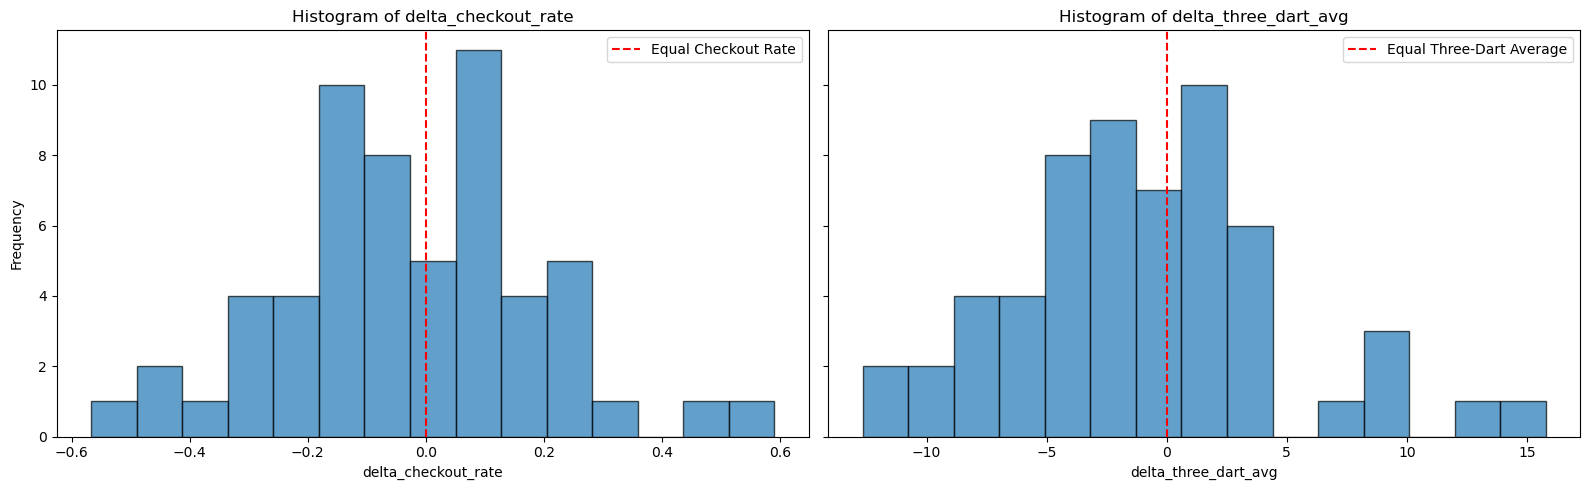

In [8]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Plot histogram for delta_checkout_rate
axes[0].hist(df['delta_checkout_rate'], bins=15, alpha=0.7, edgecolor='black')
axes[0].set_title('Histogram of delta_checkout_rate')
axes[0].set_xlabel('delta_checkout_rate')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0, color='red', linestyle='--', label='Equal Checkout Rate')
axes[0].legend()

# Plot histogram for delta_three_dart_avg
axes[1].hist(df['delta_three_dart_avg'], bins=15, alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram of delta_three_dart_avg')
axes[1].set_xlabel('delta_three_dart_avg')
axes[1].axvline(0, color='red', linestyle='--', label='Equal Three-Dart Average')
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Above is the distribution for the performance metrics `delta_checkout_rate` (calculated as `p1_checkout_rate` minus `p2_checkout_rate`) and `delta_three_dart_avg` (calculated as `p1_three_dart_avg` minus `p2_three_dart_avg`). These features will be used to predict match outcomes - to be discussed in the next section.

For `delta_checkout_rate`, we observe an approximately symmetrical distribution centered at zero, as expected. A value of zero represents equal checkout rates for both players, which matches the expectation that neither `player1` has a consistent advantage in checkout performance over `player2` across matches, or vice versa.

For `delta_three_dart_avg`, however, we observe a slightly asymmetrical distribution (sample mean $\bar{x} = -0.96$), suggesting three-dart averages tend to be slightly higher for `player2`. Before drawing any conclusions however it’s important to consider the small dataset size. After feature engineering and data filtering, the dataset contains only $n=58$ records, so the observed asymmetry in the distribution could simply be due to chance.

In [9]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(df['delta_three_dart_avg'], 0)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.2696765755713353
P-value: 0.2093591383574282


Running a t-test to evaluate whether the mean of `delta_three_dart_avg` is significantly different from zero, we find $p=0.209$. Therefore, at the 5% significance level, we fail to reject the null hypothesis ($H_0: \mu = 0$), indicating that there is no strong evidence to suggest the observed imbalance in the distribution is statistically significant. It is likely due to chance and the small sample size. Nonetheless, as we proceed to modeling, it will be important to collect more data to improve the reliability of our results - especially since the dataset will need to be split into separate training and testing sets.

### II. Match Outcome Metrics

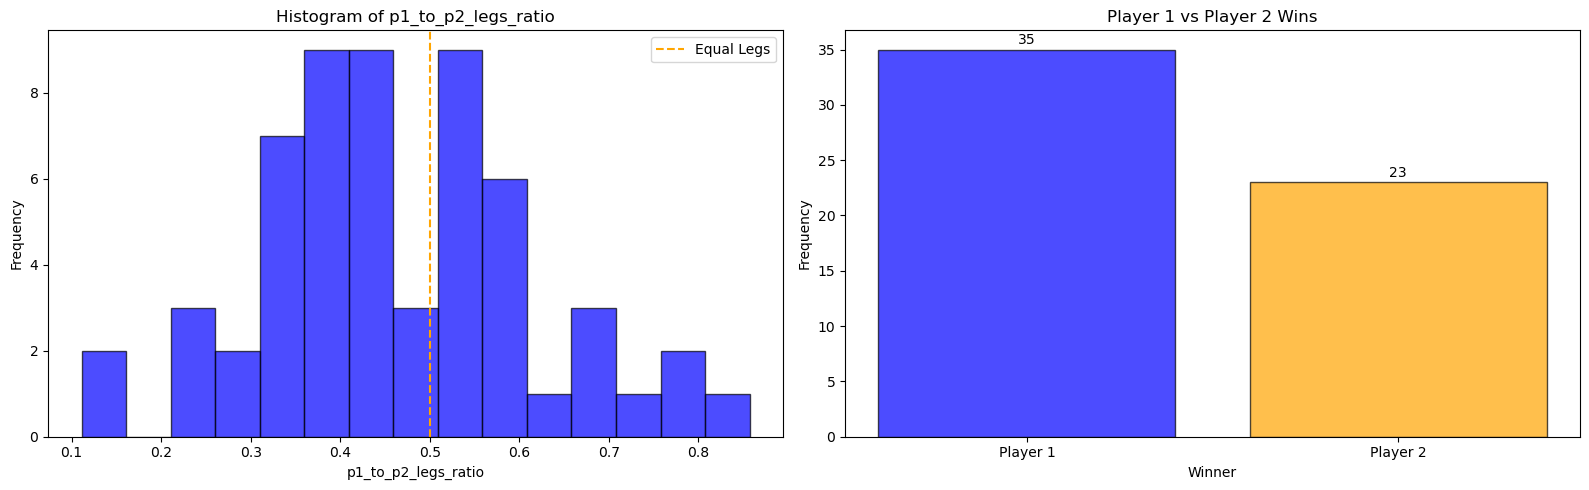

In [14]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot histogram for p1_to_p2_legs_ratio on the LHS
axes[0].hist(df['p1_to_p2_legs_ratio'], bins=15, alpha=0.7, edgecolor='black', color='blue')
axes[0].set_title('Histogram of p1_to_p2_legs_ratio')
axes[0].set_xlabel('p1_to_p2_legs_ratio')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0.5, color='orange', linestyle='--', label='Equal Legs')
axes[0].legend()

# Plot player1 vs player2 wins on the RHS
win_counts = df['winner'].value_counts()
bars = axes[1].bar(win_counts.index, win_counts.values, color=['blue', 'orange'], edgecolor='black', alpha=0.7)
axes[1].set_title('Player 1 vs Player 2 Wins')
axes[1].set_xlabel('Winner')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Player 1', 'Player 2'])

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

For `p1_to_p2_legs_ratio`, we observe an approximately symmetrical distribution centered around $0.5$, though the dataset shows a slight imbalance with more `player1` wins than `player2`, likely due to the small sample size. A `p1_to_p2_legs_ratio` of $0.5$ represents an equal number of legs won by both players. The approximately symmetrical distribution suggests that across matches, `player1` and `player2` are equally likely to win more legs than the other, as expected.

### III. Relationship Between $x_{\Delta \text{ThreeDartAvg}}$, $x_{\Delta \text{CheckoutRate}}$ and Match Outcome

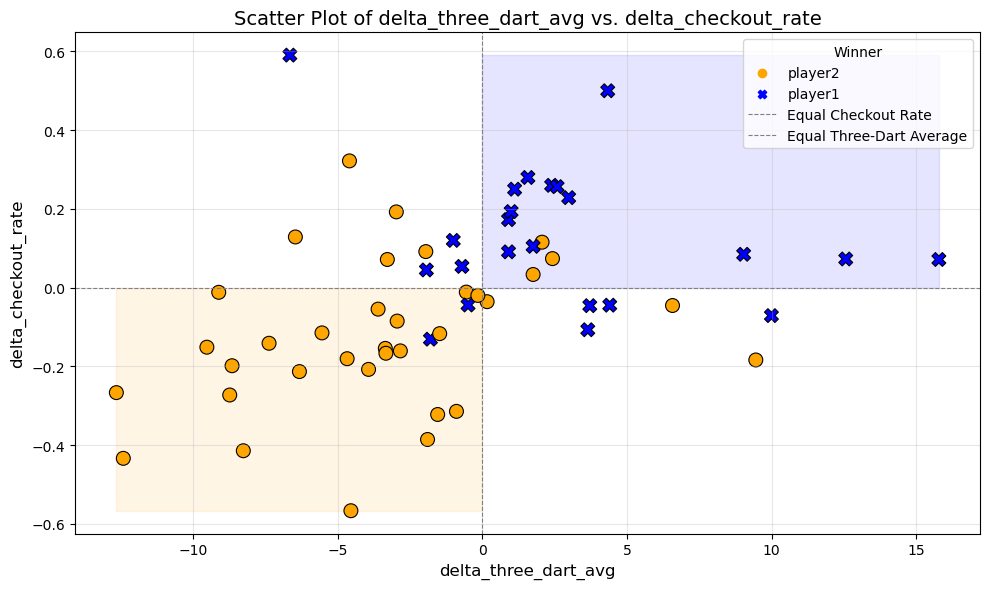

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define boundaries for shading
x_min, x_max = df['delta_three_dart_avg'].min(), df['delta_three_dart_avg'].max()
y_min, y_max = df['delta_checkout_rate'].min(), df['delta_checkout_rate'].max()

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Add shaded regions for quadrantsn
plt.fill_betweenx(np.linspace(0, y_max, 500), 0, x_max, color='blue', alpha=0.1)
plt.fill_betweenx(np.linspace(y_min, 0, 500), x_min, 0, color='orange', alpha=0.1)

sns.scatterplot(
    data=df,
    x='delta_three_dart_avg',
    y='delta_checkout_rate',
    hue='winner',
    palette={'player1': 'blue', 'player2': 'orange'},
    style='winner',
    s=100,
    edgecolor='black'
)

# Add titles and labels
plt.title('Scatter Plot of delta_three_dart_avg vs. delta_checkout_rate', fontsize=14)
plt.xlabel('delta_three_dart_avg', fontsize=12)
plt.ylabel('delta_checkout_rate', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Equal Checkout Rate')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8, label='Equal Three-Dart Average')
plt.legend(title='Winner', loc='upper right')
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

Comparing player performance metrics with match outcomes, we observe the expected relationship: players are more likely to win as their performance metrics improve. For example, the blue quadrant represents matches where `player1` had both a superior three-dart average and checkout rate compared to `player2`, and we notice most outcomes in this quadrant correspond to `player1` wins. Similarly, the orange quadrant highlights a similar trend for `player2`, reinforcing the close relationship between these performance metrics and match outcomes.